In [ ]:
import os

In [ ]:
TIDE_PATH="/media/susmita/b3b9571f-7454-4bd3-93df-d81f26409fcc/tide/TiDE/"
TIDE_LIB="/media/susmita/b3b9571f-7454-4bd3-93df-d81f26409fcc/tide/TiDE/src/.libs"

In [ ]:
import tidepy
import numpy as np
import matplotlib.pyplot as plt


In [ ]:


p=tidepy.Parameters()



In [ ]:
p.bh_M6 = 1.5
p.star_mstar = 1.25
p.tend = 1000
p.param_init()


In [ ]:
lc=tidepy.Light_curve_of_tde(p)

res=lc.light_curve()

plt.plot(res[0],res[1]*p.nu)
plt.yscale('log')
plt.ylim(bottom=1e39)
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')

In [ ]:
tidepy.tide.lib.get_parameters_tmin(p.param)

In [ ]:
wind_component=tidepy.Wind_part_of_lc(p)
disk_component=tidepy.Disk_part_of_lc(p)

pt_w = wind_component.wind_luminosity_at_time(p.tstart_value+10)
pt_d = disk_component.disk_luminosity_at_time(p.tstart_value+10)

pt_tot=(pt_w+pt_d)*p.nu

plt.plot(res[0],res[1]*p.nu)
plt.plot(p.tstart_value+10,pt_tot,'o')
plt.yscale('log')
plt.ylim(bottom=1e39)
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')

In [ ]:
import tidepy
import numpy as np
import matplotlib.pyplot as plt

p=tidepy.Parameters()
p.bh_M6 = 1.5
p.star_mstar = 1.25
p.tend = 1000
p.param_init()

def light_curve_in_mass_range(masses):
    p = tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results

massgrid=np.arange(0.1,1.505,0.1)

allcurve = light_curve_in_mass_range(massgrid)

plt.figure(dpi=150,tight_layout=True)
for mass,crv in zip(massgrid,allcurve):
    print(crv[0])
    print(crv[1])
    plt.plot(crv[0],crv[1]*p.nu,label=f'$M_6={mass:.1f}\\,M_\\odot$')
plt.ylim(bottom=1e39)
plt.yscale('log')
plt.legend(bbox_to_anchor=[1.1,1])
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')



TRYING TO SAVE THE TIME AND LUMINOSITIES FOR THE DIFFERENT MODELS

DEBUG: TIDE_LIB path is:/media/susmita/b3b9571f-7454-4bd3-93df-d81f26409fcc/tide/TiDE/src/.libs


/home/susmita/.conda/envs/rubin-sim/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in disk_luminosity_at_time (vectorized)
  outputs = ufunc(*inputs)
/home/susmita/.conda/envs/rubin-sim/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: overflow encountered in disk_luminosity_at_time (vectorized)
  outputs = ufunc(*inputs)


[ 2.04809025  2.54809025  3.04809025  3.54809025  4.04809025  4.54809025
  5.04809025  5.54809025  6.04809025  6.54809025  7.04809025  7.54809025
  8.04809025  8.54809025  9.04809025  9.54809025 10.04809025 10.54809025
 11.04809025 11.54809025 12.04809025 12.54809025 13.04809025 13.54809025
 14.04809025 14.54809025 15.04809025 15.54809025 16.04809025 16.54809025
 17.04809025 17.54809025 18.04809025 18.54809025 19.04809025 19.54809025
 20.04809025 20.54809025 21.04809025 21.54809025 22.04809025 22.54809025
 23.04809025 23.54809025 24.04809025 24.54809025 25.04809025 25.54809025
 26.04809025 26.54809025 27.04809025 27.54809025 28.04809025 28.54809025
 29.04809025 29.54809025 30.04809025 30.54809025 31.04809025 31.54809025
 32.04809025 32.54809025 33.04809025 33.54809025 34.04809025 34.54809025
 35.04809025 35.54809025 36.04809025 36.54809025 37.04809025 37.54809025
 38.04809025 38.54809025 39.04809025 39.54809025 40.04809025 40.54809025
 41.04809025 41.54809025 42.04809025 42.54809025 43

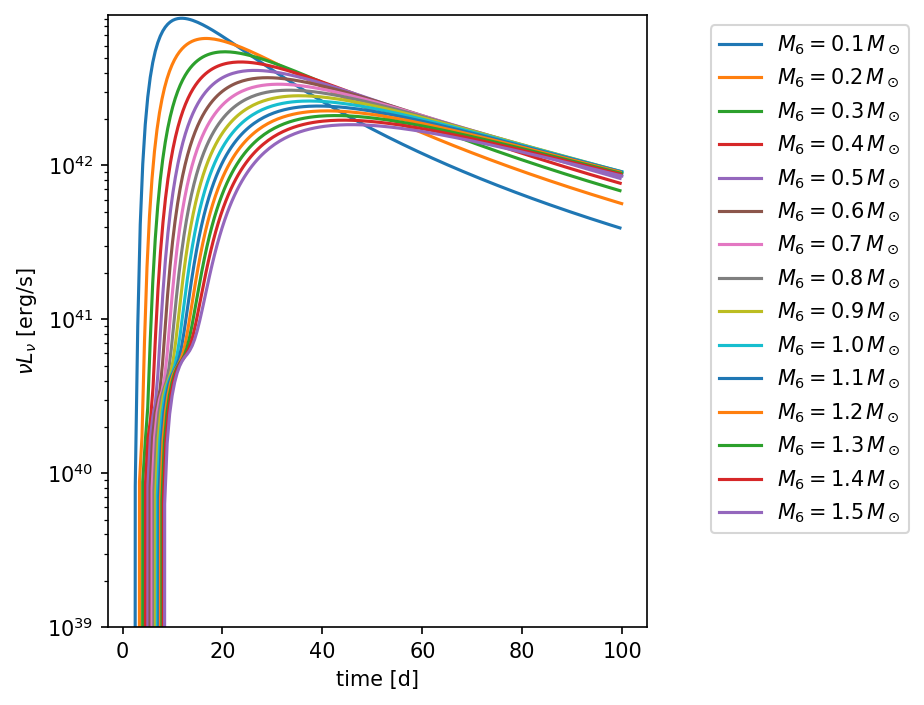

In [1]:
import tidepy
import numpy as np
import matplotlib.pyplot as plt

p = tidepy.Parameters()

def light_curve_in_mass_range(masses):
    p = tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results

massgrid = np.arange(0.1, 1.505, 0.1)

allcurve = light_curve_in_mass_range(massgrid)

plt.figure(dpi=150, tight_layout=True)
for mass, crv in zip(massgrid, allcurve):
    time = crv[0]
    luminosity = crv[1] * p.nu
    print(time)
    print(luminosity)
    
    # Save time and luminosity to a file for each mass
    filename = f"light_curve_M6_{mass:.1f}.txt"
    np.savetxt(filename, np.column_stack((time, luminosity)), header="Time [d]   Luminosity [erg/s]", fmt="%.6e")
    
    plt.plot(time, luminosity, label=f'$M_6={mass:.1f}\\,M_\\odot$')

plt.ylim(bottom=1e39)
plt.yscale('log')
plt.legend(bbox_to_anchor=[1.1, 1])
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')
plt.show()


In [ ]:
massgrid=np.arange(0.1,1.505,0.1)

allcurve = light_curve_in_mass_range(massgrid)

In [ ]:
plt.figure(dpi=150,tight_layout=True)
for mass,crv in zip(massgrid,allcurve):
    print(crv[0])
    print(crv[1])
    plt.plot(crv[0],crv[1]*p.nu,label=f'$M_6={mass:.1f}\\,M_\\odot$')
plt.ylim(bottom=1e39)
plt.yscale('log')
plt.legend(bbox_to_anchor=[1.1,1])
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.phot_utils import DustValues
import tidepy

# Light Curve Properties - Update for TDEs
SYS_PROPS = {
    'lc_mean': 400.0,  # Placeholder, will be generated by tidepy
    'lc_std': 1.0,     # Placeholder, can adjust based on light curve spread
}

# Rubin Constraints (as in original)
LSST_SINGLE_EPOCH_DEPTH = {
    "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
}

FILTER_COLORS = {
    "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
}

# Custom Metric Class for Rubin
class MyCustomTDEMetric(maf.BaseMetric):
    def __init__(self, event_id, bh_mass, star_mass, sys_props, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.bh_mass = bh_mass
        self.star_mass = star_mass
        self.sys_props = sys_props
        self.mjd_col = mjd_col
        self.ebv = ebv
        self.distance = distance
        
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1
        
        self.filters = list(self.ax1.keys())
        
        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)

    def run(self, data_slice, slice_point=None):
        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):", len(times))

        # Generate the light curve using tidepy with the given masses
        p = tidepy.Parameters()
        p.bh_M6 = self.bh_mass
        p.star_mstar = self.star_mass
        p.tend = 1000  # You can change this if needed
        p.param_init()
        lc = tidepy.Light_curve_of_tde(p)
        model_values = lc.light_curve()

        # Ensure that model_values is a 1D array
        model_values = np.ravel(model_values)  # Flattening in case it's not a 1D array

        # Adjust times (if needed)
        start_mjd = 60000
        model_times = start_mjd + np.linspace(0, len(model_values)-1, len(model_values))

        # Apply extinction and Rubin constraints
        sorted_times = times
        sorted_magnitudes = self.apply_rubin_constraints(model_times, model_values)

        # Saving light curve data
        ra, dec = slice_point['ra'], slice_point['dec']
        base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'
        self.save_lightcurve_data(base_filename, sorted_times, sorted_magnitudes)

        self.plot_lightcurve(sorted_times, sorted_magnitudes, ra, dec, base_filename)

        return np.mean(sorted_magnitudes)

    def apply_rubin_constraints(self, times, model_values):
        # Apply extinction (dust) and magnitude constraints for Rubin
        extinction_coefficients = {
            'u': 4.8, 'g': 3.6, 'r': 2.7, 'i': 2.05, 'z': 1.5, 'y': 1.3
        }

        magnitudes_all = []
        for filtername in self.filters:
            a_x = extinction_coefficients[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

            m_ref = LSST_SINGLE_EPOCH_DEPTH[filtername]
            magnitudes = -2.5 * np.log10(np.abs(values_with_extinction)) + m_ref

            # Apply magnitude depth constraint
            mask = (magnitudes < LSST_SINGLE_EPOCH_DEPTH[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]
            
            magnitudes_all.append(magnitudes_filtered)

        # Returning the filtered magnitudes
        return np.concatenate(magnitudes_all)  # Flattening any multi-filter magnitudes

    def save_lightcurve_data(self, filename, times, magnitudes):
        header = 'time magnitude\n'
        np.savetxt(f'{filename}_lightcurve.dat', np.column_stack((times, magnitudes)), header=header, comments='')

    def plot_lightcurve(self, times, magnitudes, ra, dec, filename):
        plt.figure()
        plt.errorbar(times, magnitudes, fmt='o', markersize=2, color='blue', label='TDE Lightcurve')

        plt.xlabel('Time (MJD)')
        plt.ylabel('Magnitude')
        plt.title(f'TDE Lightcurve, RA: {ra:.2f}, Dec: {dec:.2f}')
        plt.legend()
        plt.gca().invert_yaxis()
        plt.savefig(filename + '_lightcurve.png')
        plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1

        # Loop over different black hole and star masses
        bh_masses = [1.5, 2.0, 3.0]  # Example BH masses in solar masses
        star_masses = [1.25, 1.5, 2.0]  # Example stellar masses in solar masses

        for bh_mass in bh_masses:
            for star_mass in star_masses:
                # Create the metric with the given masses
                psd_metric = MyCustomTDEMetric(event_id=event_id, bh_mass=bh_mass, star_mass=star_mass,
                                               sys_props=SYS_PROPS, ebv=ebv, distance=distance)
                test_slicer = maf.UserPointsSlicer(ra, dec)
                bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
                bundles_dict[f'tde_lightcurve_{event_id}_bh{bh_mass}_star{star_mass}'] = bundle

    g = maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def light_curve_in_mass_range(masses):
    p = tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results

# Constants
L_nu_0 = 3.0128e28  # Reference luminosity in erg/s/Hz (for magnitude conversion)

# Time offset for MJD calculation (this is an example; you can use a specific reference date)
t0 = 0  # Modify this if you have a specific epoch for time

# Mass grid
massgrid = np.arange(0.1, 1.505, 0.1)

# Calculate all light curves
allcurve = light_curve_in_mass_range(massgrid)

# Save each light curve to a separate .dat file with time in MJD and luminosity in magnitude
for mass, crv in zip(massgrid, allcurve):
    time = crv[0]
    luminosity = crv[1] * p.nu  # Luminosity in erg/s
    
    # Convert time from days to MJD
    mjd = time + t0 - 2400000.5  # Assuming time is in days and adding reference epoch t0

    # Convert luminosity to magnitude
    magnitude = -2.5 * np.log10(luminosity / L_nu_0)
    
    # Create a filename for each mass value
    filename = f'lightcurve_M6_{mass:.1f}.dat'
    
    # Save the data in two columns: time (MJD) and magnitude
    np.savetxt(filename, np.column_stack((mjd, magnitude)), header='MJD   Magnitude', comments='#')

    # Optionally, print out the filename being saved
    print(f'Saving light curve to {filename}')

# Plot the light curves
plt.figure(dpi=150, tight_layout=True)
for mass, crv in zip(massgrid, allcurve):
    plt.plot(crv[0], crv[1] * p.nu, label=f'$M_6={mass:.1f}\\,M_\\odot$')

plt.ylim(bottom=1e39)
plt.yscale('log')
plt.legend(bbox_to_anchor=[1.1, 1])
plt.xlabel('time [d]')
plt.ylabel(r'$\nu L_\nu$ [erg/s]')
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.phot_utils import DustValues
import random
import numpy as np
from scipy.interpolate import interp1d
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.timeseries import LombScargle
import P4J

from rubin_sim.maf.utils import m52snr

def amplitude_to_magnitude(model_values, m_ref):
    return -2.5 * np.log10(np.abs(model_values)) + m_ref

def light_curve_in_mass_range(masses):
    p=tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results

# Light Curve Binning Function
def lc_binning(t,y,dy,width):
    """
    Simple function to bin lightcurves with errors.
    """
    if width == 0:
        return t, y, dy
    else:
        width = float(width)
        nbins = int(np.ceil((t[-1]-t[0])/width))
        binned_y = np.zeros(nbins)
        binned_y_weights = np.zeros(nbins)

        for i in range(len(y)):
            bin_no = int((t[i]-t[0])/width)
            weight = dy[i]**-2.0
            binned_y[bin_no] += y[i] * weight
            binned_y_weights[bin_no] += weight

        binned_y /= binned_y_weights
        binned_dy = np.sqrt(1.0/(binned_y_weights)) 
        binned_t = np.arange(start=t[0]+(width/2.0),stop=t[0]+nbins*width,step=width)
        return binned_t, binned_y, binned_dy

class MyCustomPSDMetric(maf.BaseMetric):
    def __init__(self, event_id, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.mjd_col  = mjd_col
        self.ebv = ebv
        self.distance = distance
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1

        self.filters = list(self.ax1.keys())

        self.lsst_single_epoch_depth = {
            "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
        }

        self.filter_colors = {
            "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
        }
        
        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)

    def run(self, data_slice, slice_ppoint=None):
        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):")
        print(len(times))



        massgrid=np.arange(0.1,1.505,0.1)

        lightcurve = light_curve_in_mass_range(massgrid)

    # Access the time and flux from the Lightcurve object
        model_times1 = lightcurve.time  # Assuming 'time' is the attribute for time values
        print("Simulated Model Times (before adjustment):")
        print(model_times1)  # Debugging: Print simulated model times before adjustment
        model_values = lightcurve.flux
        print("Simulated Model Flux or Magnitude:")
        print(model_values)  # Debugging: Print simulated model flux

        # Change to MJD for easier use
        start_mjd = 60000
        model_times = start_mjd + model_times1

        # Debugging: Print adjusted model times
        print("Simulated Model Times (adjusted to MJD):")
        print(model_times)

        # Check the alignment of observed times with simulated model times
        print("Observed Times vs. Simulated Model Times:")
        for observed_time in times:
            closest_model_time = model_times[np.abs(model_times - observed_time).argmin()]
            print(f"Observed Time: {observed_time}, Closest Model Time: {closest_model_time}")

        # Getting the corresponding magnitudes for the specified slice
        indices = np.searchsorted(model_times, times)
        indices = np.clip(indices, 0, len(model_times1) - 1)
        corresponding_magnitudes = model_values[indices]
        sorted_indices = np.argsort(times)
        sorted_times = times[sorted_indices]
        sorted_magnitudes = corresponding_magnitudes[sorted_indices]

        # Magnitude Error Calculation (SNR-based)
        snr = m52snr(sorted_magnitudes, self.lsst_single_epoch_depth["r"])  # Example with "r" filter
        mags_unc = 2.5 * np.log10(1 + 1.0 / snr)

        # File saving logic (same as before)...
        ra, dec = slice_point['ra'], slice_point['dec']
        
        base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'
        lightcurve_filename = f'{base_filename}.dat'
        model_filename = f'{base_filename}_model.dat'
        sorted_filename = f'{base_filename}_sorted.dat'
        obs_mag_filename = f'{base_filename}_obsmag.dat'

        header = (f'time flux\n')
        np.savetxt(obs_mag_filename, np.column_stack((sorted_times, sorted_magnitudes)), header=header, comments='')
        
        # Saving model data before any filtering
        header = (f'time flux\n')
        np.savetxt(model_filename, np.column_stack((model_times, model_values)), header=header, comments='')

        # NUMBER OF DAYS TO SIMULATE
        num_days_to_simulate = 3650
        mask = (sorted_times >= sorted_times.min()) & (sorted_times <= sorted_times.min() + num_days_to_simulate)
        times, model_values = sorted_times[mask], sorted_magnitudes[mask]

        # Saving the filtered and sorted times and model_values to a file after applying num of days to simulate
        header = (f'time flux\n')
        np.savetxt(lightcurve_filename, np.column_stack((times, model_values)), header=header, comments='')

        self.plot_lightcurve_only(times, model_values, mags_unc, ra, dec, lightcurve_filename)
        self.plot_model_and_lightcurve(times, model_values, ra, dec, lightcurve_filename)
        
        return np.mean(model_values)
    
    def plot_lightcurve_only(self, times, model_values, mags_unc, ra, dec, filename):
        extinction_coefficients = {
            'u': 4.8, 'g': 3.6, 'r': 2.7, 'i': 2.05, 'z': 1.5, 'y': 1.3
        }

        for filtername in self.filters:
            plt.figure()

            a_x = extinction_coefficients[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

            m_ref = self.lsst_single_epoch_depth[filtername]
            magnitudes = amplitude_to_magnitude(values_with_extinction, m_ref)

            # Apply the same calculation for magnitude uncertainties (SNR-based)
            snr_filter = m52snr(magnitudes, self.lsst_single_epoch_depth[filtername])
            mags_unc_filter = 2.5 * np.log10(1 + 1.0 / snr_filter)

            mask = (magnitudes < self.lsst_single_epoch_depth[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]
            mags_unc_filtered = mags_unc_filter[mask]

            filter_filename = filename.replace('.dat', f'_filter_{filtername}.dat')
            np.savetxt(filter_filename, np.column_stack((times_filtered, magnitudes_filtered, mags_unc_filtered)),
                       header='time magnitude mag_unc\n', comments='')

            plt.errorbar(times_filtered, magnitudes_filtered, yerr=mags_unc_filtered, fmt='o', markersize=2, 
                         color=self.filter_colors[filtername], label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Magnitude')
            plt.title(f'Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.gca().invert_yaxis()
            plt.savefig(filename.replace('.dat', f'_lightcurve_{filtername}.png'))
            plt.close()

    def plot_model_and_lightcurve(self, times, model_values, ra, dec, filename):
        for filtername in self.filters:
            plt.figure()
            plt.plot(times, model_values, 'o', markersize=2, label='Model Lightcurve (no extinction)')

            a_x = self.ax1[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

        # Calculate magnitudes the same way as in plot_lightcurve_only
            m_ref = self.lsst_single_epoch_depth[filtername]
            magnitudes = amplitude_to_magnitude(values_with_extinction, m_ref)

            mask = (magnitudes < self.lsst_single_epoch_depth[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]

            plt.plot(times_filtered, magnitudes_filtered, 'x', markersize=2, color=self.filter_colors[filtername],
                 label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Magnitude')
            plt.title(f'Model and Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.gca().invert_yaxis()
            plt.savefig(filename.replace('.dat', f'_model_lightcurve_{filtername}.png'))
            plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        print(ra)
        print(dec)
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1


        psd_metric = MyCustomPSDMetric(event_id=event_id, ebv=ebv, distance=distance)
        test_slicer = maf.UserPointsSlicer(ra, dec)
        bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
        bundles_dict[f'psd_lightcurve_{event_id}'] = bundle

    g= maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()






In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.phot_utils import DustValues
import random
import numpy as np
from scipy.interpolate import interp1d
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.timeseries import LombScargle
import P4J

from rubin_sim.maf.utils import m52snr
import tidepy

def light_curve_in_mass_range(masses):
    p = tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results  # Each element in 'results' is a 2-element tuple: (time, flux)

def amplitude_to_magnitude(model_values, m_ref):
    # Convert flux to magnitudes
    return -2.5 * np.log10(np.abs(model_values)) + m_ref

class MyCustomPSDMetric(maf.BaseMetric):
    def __init__(self, event_id, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.mjd_col = mjd_col
        self.ebv = ebv
        self.distance = distance
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1

        self.filters = list(self.ax1.keys())

        self.lsst_single_epoch_depth = {
            "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
        }

        self.filter_colors = {
            "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
        }

        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)

    def run(self, data_slice, slice_ppoint=None, slice_point=None):
        if slice_point is not None:
            ra, dec = slice_point['ra'], slice_point['dec']
        else:
            ra, dec = 0.0, 0.0

        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):")
        print(len(times))

        massgrid = np.arange(0.1, 1.505, 0.1)
        lightcurve = light_curve_in_mass_range(massgrid)

        all_times = []
        all_fluxes = []

        for mass, crv in zip(massgrid, lightcurve):
            all_times.append(crv[0])  # Store times from each curve
            all_fluxes.append(crv[1])  # Store fluxes from each curve

        # Convert to numpy arrays
        all_times = np.concatenate(all_times)
        all_fluxes = np.concatenate(all_fluxes)

        # MJD for easier use
        start_mjd = 60000
        model_times = start_mjd + all_times

        print("Simulated Model Times (adjusted to MJD):")
        print(model_times)

        # Getting the corresponding fluxes for the specified slice
        indices = np.searchsorted(model_times, times)
        indices = np.clip(indices, 0, len(model_times) - 1)
        corresponding_fluxes = all_fluxes[indices]
        sorted_indices = np.argsort(times)
        sorted_times = times[sorted_indices]
        sorted_fluxes = corresponding_fluxes[sorted_indices]

        # Apply Rubin's filter sampling and dust extinction
        observed_magnitudes = {}
        
        # Define base_filename here
        base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'

        for filtername in self.filters:
            extinction = self.ax1[filtername] * self.ebv
            # Convert fluxes to magnitudes
            magnitudes = amplitude_to_magnitude(sorted_fluxes, self.lsst_single_epoch_depth[filtername])
            # Apply extinction correction
            magnitudes_with_extinction = magnitudes + extinction + 5 * np.log10(self.distance * 1.0e3) - 5.0
            # Apply Rubin's filter depth (observe only those magnitudes below the depth)
            mask = magnitudes_with_extinction <= self.lsst_single_epoch_depth[filtername]
            observed_magnitudes[filtername] = magnitudes_with_extinction[mask]
            observed_times = sorted_times[mask]

            # Save observed lightcurve for this filter
            filter_filename = f"{base_filename}_filter_{filtername}_observed.dat"
            np.savetxt(filter_filename, np.column_stack((observed_times, observed_magnitudes[filtername])),
                       header="time magnitude\n", comments="")

            # Plot the observed lightcurve
            self.plot_observed_lightcurve(observed_times, observed_magnitudes[filtername], filtername, ra, dec)

        return np.mean(sorted_fluxes)

    def plot_observed_lightcurve(self, times, magnitudes, filtername, ra, dec):
        plt.figure(dpi=150, tight_layout=True)
        plt.plot(times, magnitudes, label=f'{filtername} observed', color=self.filter_colors[filtername])
        plt.xlabel('Time [MJD]')
        plt.ylabel('Magnitude')
        plt.title(f"Observed Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}")
        plt.gca().invert_yaxis()  # Magnitude scale is inverted
        plt.legend()
        plt.savefig(f"observed_lightcurve_{filtername}.png")
        plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        print(ra)
        print(dec)
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1

        psd_metric = MyCustomPSDMetric(event_id=event_id, ebv=ebv, distance=distance)
        test_slicer = maf.UserPointsSlicer(ra, dec)
        bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
        bundles_dict[f'psd_lightcurve_{event_id}'] = bundle

    g = maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.phot_utils import DustValues
import random
import numpy as np
from scipy.interpolate import interp1d
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.timeseries import LombScargle
import P4J

from rubin_sim.maf.utils import m52snr
import tidepy

def light_curve_in_mass_range(masses):
    p = tidepy.Parameters()
    lc_calculator = tidepy.Light_curve_of_tde(p)
    results = []
    for M6 in masses:
        lc_calculator.PythonPar.bh_M6 = M6
        lc_calculator.PythonPar.param_init()
        results.append(lc_calculator.light_curve())
    return results  # Each element in 'results' is a 2-element tuple: (time, flux)

def amplitude_to_magnitude(model_values, m_ref):
    # Convert flux to magnitudes
    return -2.5 * np.log10(np.abs(model_values)) + m_ref

class MyCustomPSDMetric(maf.BaseMetric):
    def __init__(self, event_id, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.mjd_col = mjd_col
        self.ebv = ebv
        self.distance = distance
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1

        self.filters = list(self.ax1.keys())

        self.lsst_single_epoch_depth = {
            "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
        }

        self.filter_colors = {
            "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
        }

        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)

    def run(self, data_slice, slice_ppoint=None, slice_point=None):
        if slice_point is not None:
            ra, dec = slice_point['ra'], slice_point['dec']
        else:
            ra, dec = 0.0, 0.0

        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):")
        print(len(times))

        massgrid = np.arange(0.1, 1.505, 0.1)
        lightcurve = light_curve_in_mass_range(massgrid)

        all_times = []
        all_fluxes = []

        for mass, crv in zip(massgrid, lightcurve):
            all_times.append(crv[0])  # Store times from each curve
            all_fluxes.append(crv[1])  # Store fluxes from each curve

        # Convert to numpy arrays
        all_times = np.concatenate(all_times)
        all_fluxes = np.concatenate(all_fluxes)

        # MJD for easier use
        start_mjd = 60000
        model_times = start_mjd + all_times

        print("Simulated Model Times (adjusted to MJD):")
        print(model_times)

        # Getting the corresponding fluxes for the specified slice
        indices = np.searchsorted(model_times, times)
        indices = np.clip(indices, 0, len(model_times) - 1)
        corresponding_fluxes = all_fluxes[indices]
        sorted_indices = np.argsort(times)
        sorted_times = times[sorted_indices]
        sorted_fluxes = corresponding_fluxes[sorted_indices]

        # Apply Rubin's filter sampling and dust extinction
        observed_magnitudes = {}
        
        # Define base_filename here
        base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'

        for filtername in self.filters:
            extinction = self.ax1[filtername] * self.ebv
            # Convert fluxes to magnitudes
            magnitudes = amplitude_to_magnitude(sorted_fluxes, self.lsst_single_epoch_depth[filtername])
            # Apply extinction correction
            magnitudes_with_extinction = magnitudes + extinction + 5 * np.log10(self.distance * 1.0e3) - 5.0
            # Apply Rubin's filter depth (observe only those magnitudes below the depth)
            mask = magnitudes_with_extinction <= self.lsst_single_epoch_depth[filtername]
            observed_magnitudes[filtername] = magnitudes_with_extinction[mask]
            observed_times = sorted_times[mask]

            # Save observed lightcurve for this filter
            filter_filename = f"{base_filename}_filter_{filtername}_observed.dat"
            np.savetxt(filter_filename, np.column_stack((observed_times, observed_magnitudes[filtername])),
                       header="time magnitude\n", comments="")

            # Plot the observed and model lightcurve separately
            self.plot_observed_lightcurve(observed_times, observed_magnitudes[filtername], filtername, ra, dec)
            self.plot_model_lightcurve(all_times, all_fluxes, filtername, ra, dec)

        return np.mean(sorted_fluxes)

    def plot_observed_lightcurve(self, times, magnitudes, filtername, ra, dec):
        plt.figure(dpi=150, tight_layout=True)
        plt.plot(times, magnitudes, label=f'{filtername} observed', color=self.filter_colors[filtername])
        plt.xlabel('Time [MJD]')
        plt.ylabel('Magnitude')
        plt.title(f"Observed Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}")
        plt.gca().invert_yaxis()  # Magnitude scale is inverted
        plt.legend()
        plt.savefig(f"observed_lightcurve_{filtername}.png")
        plt.close()

    def plot_model_lightcurve(self, all_times, all_fluxes, filtername, ra, dec):
        plt.figure(dpi=150, tight_layout=True)
        
        # Convert fluxes to magnitudes for the model
        model_magnitudes = amplitude_to_magnitude(all_fluxes, self.lsst_single_epoch_depth[filtername])
        model_magnitudes_with_extinction = model_magnitudes + self.ax1[filtername] * self.ebv + 5 * np.log10(self.distance * 1.0e3) - 5.0
        plt.plot(all_times, model_magnitudes_with_extinction, label=f'{filtername} model', linestyle='--', color='black')

        plt.xlabel('Time [MJD]')
        plt.ylabel('Magnitude')
        plt.title(f"Model Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}")
        plt.gca().invert_yaxis()  # Magnitude scale is inverted
        plt.legend()
        plt.savefig(f"model_lightcurve_{filtername}.png")
        plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        print(ra)
        print(dec)
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1

        psd_metric = MyCustomPSDMetric(event_id=event_id, ebv=ebv, distance=distance)
        test_slicer = maf.UserPointsSlicer(ra, dec)
        bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
        bundles_dict[f'psd_lightcurve_{event_id}'] = bundle

    g = maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()


In [2]:
import numpy as np

# Assuming you have a distance value in cm
distance_cm = 1*3.086e24  # example distance in cm, change it to your value

# Load the data from the .dat file
data = np.loadtxt('light_curve_M6_0.1.txt', comments='#')

# Extract time and luminosity from the data
time = data[:, 0]
luminosity = data[:, 1]

# Calculate the flux using the formula
flux = luminosity / (4 * np.pi * distance_cm**2)

# Save the results to a new file
np.savetxt('flux_data.dat', np.column_stack((time, flux)), header='Time [d]   Flux [erg/s/cm²]', comments='')

print("Flux calculation completed and saved to 'flux_data.dat'")


Flux calculation completed and saved to 'flux_data.dat'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from the text file
data = np.loadtxt('light_curve_M6_0.1.txt', comments='#')

# Extract time and luminosity from the loaded data
time = data[:, 0]
luminosity = data[:, 1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(time, luminosity, marker='o', linestyle='-', color='b')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Time [d]')
plt.ylabel('Luminosity [erg/s]')
plt.title('Time vs Luminosity')

# Show grid for better readability
plt.grid(False)

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Zeropoints for LSST filters
zeropoints = {
    'u': 26.52,
    'g': 28.51,
    'r': 28.36,
    'i': 28.17,
    'z': 27.78,
    'y': 26.82
}

# Function to calculate magnitude
def flux_to_magnitude(flux, zeropoint):
    return -2.5 * np.log10(flux) + zeropoint

# Load the flux data from the previously saved file, skipping the header
flux_data = np.genfromtxt('flux_data.dat', comments='#', skip_header=1)

# Extract the time and flux values
time = flux_data[:, 0]
flux = flux_data[:, 1]

# For this example, we will calculate the magnitude for a specific filter (e.g., 'r' filter)
filter_name = 'r'
zeropoint = zeropoints[filter_name]

# Calculate the magnitude for the chosen filter
magnitude = flux_to_magnitude(flux, zeropoint)

# Save the magnitude results to a new file
np.savetxt(f'magnitude_{filter_name}.dat', np.column_stack((time, magnitude)),
           header=f'Time [d]   Magnitude [{filter_name}]', comments='')

print(f"Magnitude calculation for filter '{filter_name}' completed and saved to 'magnitude_{filter_name}.dat'")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Zeropoint values for LSST filters in erg/s/cm²
zeropoints = {
    'u': 3.011e-9,   # Zeropoint for 'u' filter
    'g': 1.174e-9,   # Zeropoint for 'g' filter
    'r': 1.385e-9,   # Zeropoint for 'r' filter
    'i': 1.533e-9,   # Zeropoint for 'i' filter
    'z': 1.918e-9,   # Zeropoint for 'z' filter
    'y': 2.476e-9    # Zeropoint for 'y' filter
}

# Function to calculate the magnitude for a given flux and zeropoint
def flux_to_magnitude(flux, zeropoint):
    return -2.5 * np.log10(flux) + zeropoint

# Load the flux data, skipping the header row
flux_data = np.loadtxt('flux_data.dat', comments='#', skiprows=1)

# Extract time and flux from the data
time = flux_data[:, 0]
flux = flux_data[:, 1]

# Initialize a dictionary to store magnitudes for each filter
magnitudes = {}

# Calculate the magnitudes for each filter
for filter_name, zeropoint in zeropoints.items():
    magnitudes[filter_name] = flux_to_magnitude(flux, zeropoint)

    # Save each filter's magnitudes separately in its own file
    np.savetxt(f'{filter_name}_magnitude_data.dat', 
               np.column_stack((time, magnitudes[filter_name])), 
               header=f'Time [d]   {filter_name}_mag', comments='')

    print(f"Saved {filter_name} magnitudes to {filter_name}_magnitude_data.dat")

# Plotting the magnitudes for each filter in separate graphs
for filter_name, mag in magnitudes.items():
    plt.figure(figsize=(10, 6))

    # Plot the magnitudes for the current filter
    plt.plot(time, mag, label=f'{filter_name} filter')

    # Set the axes labels and title for the current plot
    plt.xlabel('Time [d]')
    plt.ylabel('Magnitude')

    # Set the y-axis to logarithmic scale
    plt.yscale('log')

    # Invert the y-axis (since smaller magnitudes are brighter)
    plt.gca().invert_yaxis()

    # Add a title and legend for the current filter
    plt.title(f'{filter_name} Filter Magnitudes vs Time')
    plt.legend()

    # Show the plot for the current filter
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Zeropoint values for LSST filters in erg/s/cm²
zeropoints = {
    'u': 26.52,   # Zeropoint for 'u' filter
    'g': 28.51,   # Zeropoint for 'g' filter
    'r': 28.36,   # Zeropoint for 'r' filter
    'i': 28.17,   # Zeropoint for 'i' filter
    'z': 27.78,   # Zeropoint for 'z' filter
    'y': 26.82    # Zeropoint for 'y' filter
}

# Function to calculate the magnitude for a given flux and zeropoint
def flux_to_magnitude(flux, zeropoint,d):
    return -2.5 * np.log10(flux) - zeropoint + 5* np.log10(d/10.0) #distance modulus, d must be in pc

#def distance_mod(d, M):
#    return M + 5* np.log10(d/10.0) #distance modulus, d must be in pc

# Load the flux data, skipping the header row
flux_data = np.loadtxt('flux_data.dat', comments='#', skiprows=1)

# Extract time and flux from the data
time = flux_data[:, 0]
flux = flux_data[:, 1]

# Initialize a dictionary to store magnitudes for each filter
magnitudes = {}
#app_mag = {}
d = 1.0e6 #hardcoding to 10 Mpc
# Calculate the magnitudes for each filter
for filter_name, zeropoint in zeropoints.items():
    magnitudes[filter_name] = flux_to_magnitude(flux, zeropoint,d)

    # Save each filter's magnitudes separately in its own file
    np.savetxt(f'{filter_name}_magnitude_data.dat', 
               np.column_stack((time, magnitudes[filter_name])), 
               header=f'Time [d]   {filter_name}_mag', comments='')

    print(f"Saved {filter_name} magnitudes to {filter_name}_magnitude_data.dat")
'''
## Calculate the apparent magnitudes for each filter
d = 10.0e6 #hardcoding to 10 Mpc
for filter_name, zeropoint in zeropoints.items():
    app_mag[filter_name] = distance_mod(d, magnitudes[filter_name])
    

    # Save each filter's app magnitudes separately in its own file
    np.savetxt(f'{filter_name}_appmagnitude_data.dat', 
               np.column_stack((time, app_mag[filter_name])), 
               header=f'Time [d]   {filter_name}_appmag', comments='')

    print(f"Saved {filter_name} app magnitudes to {filter_name}_appmagnitude_data.dat")
'''
# Plotting the magnitudes for each filter in separate graphs
for filter_name, mag in magnitudes.items():
    plt.figure(figsize=(10, 6))

    # Plot the magnitudes for the current filter
    plt.plot(time, mag, label=f'{filter_name} filter')

    # Set the axes labels and title for the current plot
    plt.xlabel('Time [d]')
    plt.ylabel('Magnitude')
    
    # Set the y-axis to logarithmic scale
    #plt.yscale('log')

    # Invert the y-axis (since smaller magnitudes are brighter)
    plt.gca().invert_yaxis()
    plt.ylim(27, 10)
    # Add a title and legend for the current filter
    plt.title(f'{filter_name} Filter Magnitudes vs Time')
    plt.legend()

    # Show the plot for the current filter
    plt.show()



In [ ]:
flux_data = np.loadtxt('flux_data.dat', comments='#', skiprows=1)

# Extract time and flux from the data
time = flux_data[:, 0]
flux = flux_data[:, 1]

M = 3

d = 10.0e6

app_mag = M + 5* np.log10(d/10.0)
app_mag

Saved u magnitudes to u_magnitude_data.dat
Saved u magnitudes and time to u_magnitude_time.dat
Saved g magnitudes to g_magnitude_data.dat
Saved g magnitudes and time to g_magnitude_time.dat
Saved r magnitudes to r_magnitude_data.dat
Saved r magnitudes and time to r_magnitude_time.dat
Saved i magnitudes to i_magnitude_data.dat
Saved i magnitudes and time to i_magnitude_time.dat
Saved z magnitudes to z_magnitude_data.dat
Saved z magnitudes and time to z_magnitude_time.dat
Saved y magnitudes to y_magnitude_data.dat
Saved y magnitudes and time to y_magnitude_time.dat


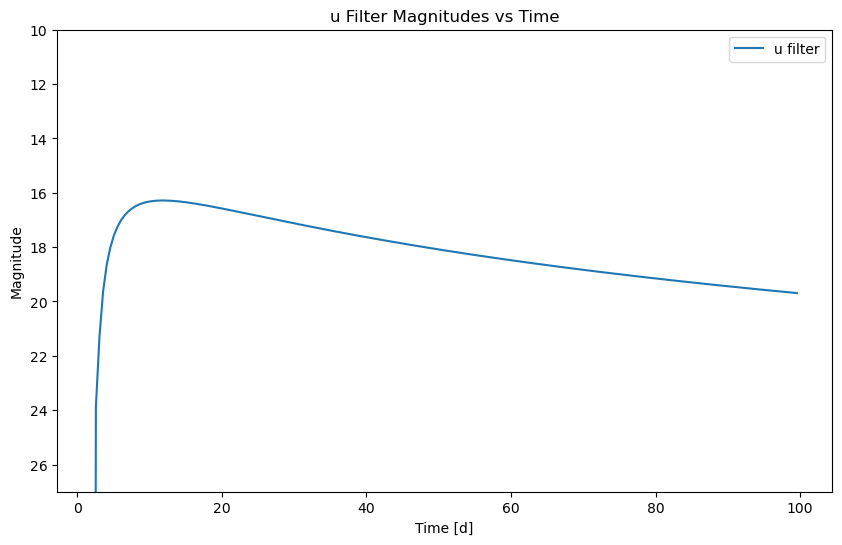

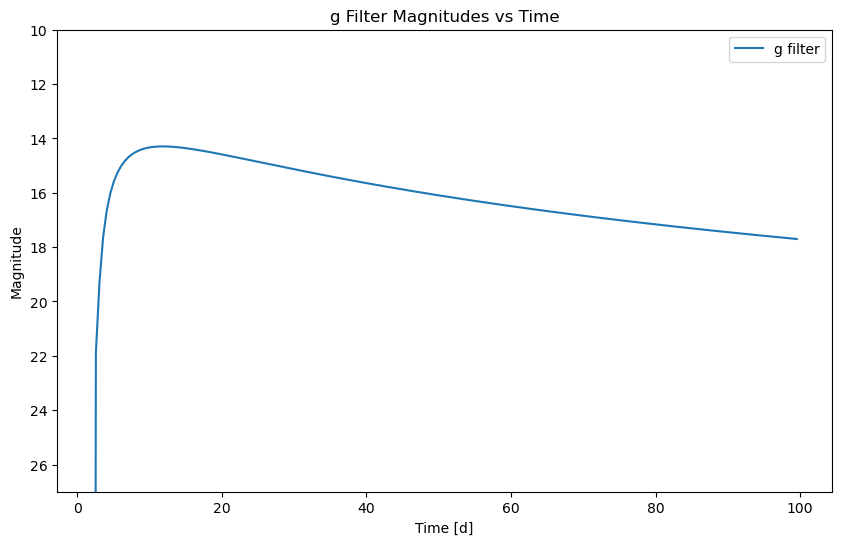

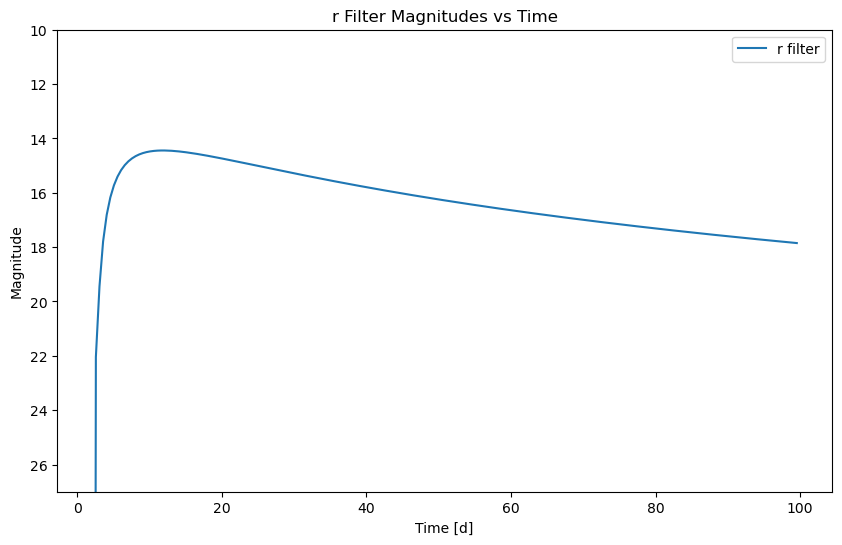

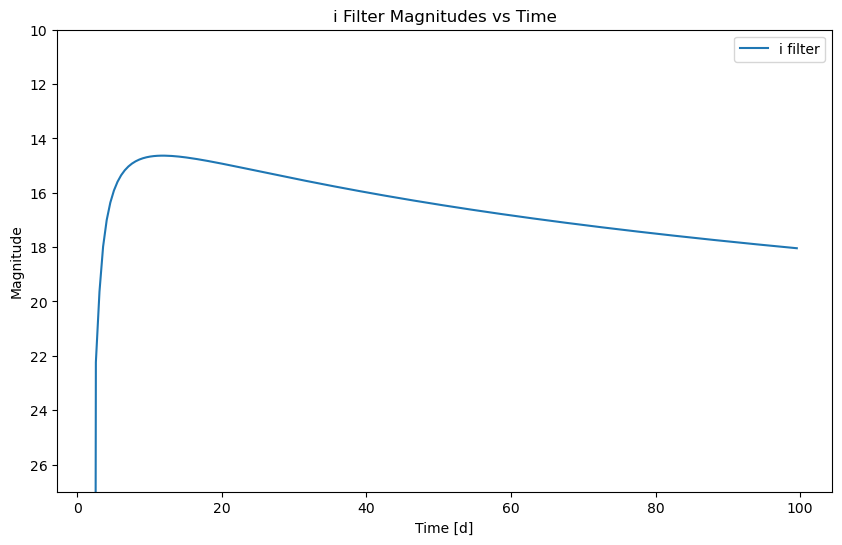

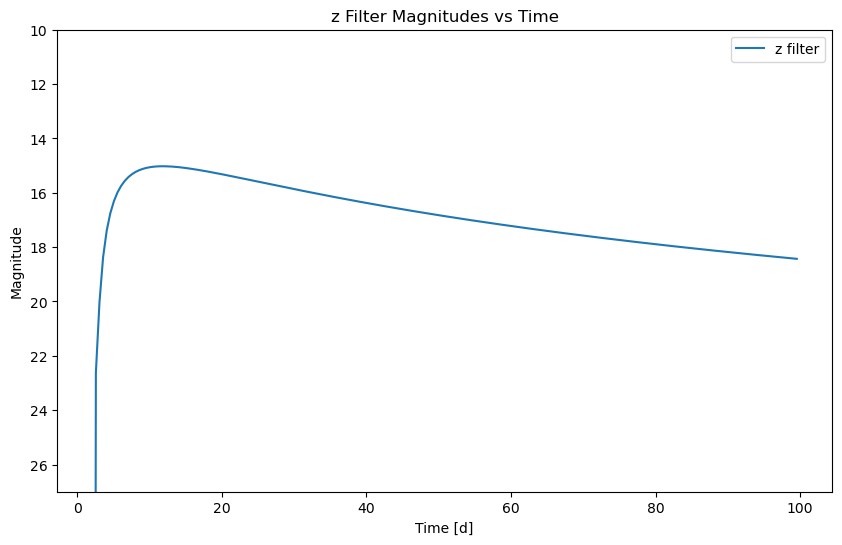

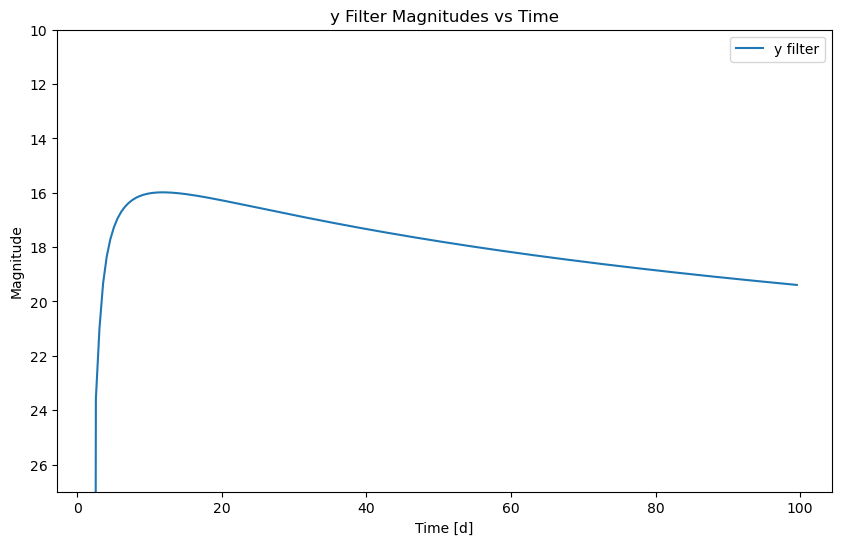

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Zeropoint values for LSST filters in erg/s/cm²
zeropoints = {
    'u': 26.52,   # Zeropoint for 'u' filter
    'g': 28.51,   # Zeropoint for 'g' filter
    'r': 28.36,   # Zeropoint for 'r' filter
    'i': 28.17,   # Zeropoint for 'i' filter
    'z': 27.78,   # Zeropoint for 'z' filter
    'y': 26.82    # Zeropoint for 'y' filter
}

# Function to calculate the magnitude for a given flux and zeropoint
def flux_to_magnitude(flux, zeropoint, d):
    return -2.5 * np.log10(flux) - zeropoint + 5 * np.log10(d / 10.0)  # distance modulus, d must be in pc

# Load the flux data, skipping the header row
flux_data = np.loadtxt('flux_data.dat', comments='#', skiprows=1)

# Extract time and flux from the data
time = flux_data[:, 0]
flux = flux_data[:, 1]

# Initialize a dictionary to store magnitudes for each filter
magnitudes = {}
d = 1.0e6  # hardcoding to 10 Mpc

# Calculate the magnitudes for each filter
for filter_name, zeropoint in zeropoints.items():
    magnitudes[filter_name] = flux_to_magnitude(flux, zeropoint, d)

    # Save each filter's magnitudes separately in its own file
    np.savetxt(f'{filter_name}_magnitude_data.dat', 
               np.column_stack((time, magnitudes[filter_name])), 
               header=f'Time [d]   {filter_name}_mag', comments='')

    # Save the magnitude and time for each filter in separate .dat files
    np.savetxt(f'{filter_name}_magnitude_time.dat', 
               np.column_stack((time, magnitudes[filter_name])), 
               header=f'Time [d]   {filter_name}_mag', comments='')

    print(f"Saved {filter_name} magnitudes to {filter_name}_magnitude_data.dat")
    print(f"Saved {filter_name} magnitudes and time to {filter_name}_magnitude_time.dat")

# Plotting the magnitudes for each filter in separate graphs
for filter_name, mag in magnitudes.items():
    plt.figure(figsize=(10, 6))

    # Plot the magnitudes for the current filter
    plt.plot(time, mag, label=f'{filter_name} filter')

    # Set the axes labels and title for the current plot
    plt.xlabel('Time [d]')
    plt.ylabel('Magnitude')

    # Invert the y-axis (since smaller magnitudes are brighter)
    plt.gca().invert_yaxis()
    plt.ylim(27, 10)

    # Add a title and legend for the current filter
    plt.title(f'{filter_name} Filter Magnitudes vs Time')
    plt.legend()

    # Show the plot for the current filter
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
data = np.loadtxt('u_magnitude_time.dat', comments='#', skiprows=1)

# Extract time and magnitude from the data
time = data[:, 0]
magnitude = data[:, 1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(time, magnitude, label='u filter magnitudes', marker='o', linestyle='-', color='b')

# Invert the y-axis (since smaller magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Time [d]')
plt.ylabel('Magnitude')
plt.title('u Filter Magnitudes vs Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.phot_utils import DustValues
import random
import numpy as np
from scipy.interpolate import interp1d
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.timeseries import LombScargle
import P4J





# Custom Metric Class
class MyCustomPSDMetric(maf.BaseMetric):
    def __init__(self, event_id, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.mjd_col = mjd_col
        self.ebv = ebv
        self.distance = distance
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1
        
        self.filters = list(self.ax1.keys())
        
        self.lsst_single_epoch_depth = {
            "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
        }

        self.filter_colors = {
            "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
        }
        
        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)
        
    def run(self, data_slice, slice_point=None):
        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):")
        print(len(times))  # Debugging: Print observed times

        lightcurve_file = 'test_converted_magnitudes.dat' #read in the lightcurve data
        lc_data = np.loadtxt(lightcurve_file, skiprows=1)

        model_times1 = lc_data[:, 0] # time
        print(model_times1)

        model_values = lc_data[:, 1] # flux

        # Change to MJD for easier use
        start_mjd = 60800
        model_times = start_mjd + model_times1

        # Debugging: Print adjusted model times
        print("Simulated Model Times (adjusted to MJD):")
        print(model_times)

        # Check the alignment of observed times with simulated model times
        print("Observed Times vs. Simulated Model Times:")
        for observed_time in times:
            closest_model_time = model_times[np.abs(model_times - observed_time).argmin()]
            print(f"Observed Time: {observed_time}, Closest Model Time: {closest_model_time}")

        # Getting the corresponding magnitudes for the specified slice
        indices = np.searchsorted(model_times, times)
        indices = np.clip(indices, 0, len(model_times1) - 1)
        corresponding_magnitudes = model_values[indices]
        sorted_indices = np.argsort(times)
        sorted_times = times[sorted_indices]
        sorted_magnitudes = corresponding_magnitudes[sorted_indices]

        # File saving logic (same as before)...
        ra, dec = slice_point['ra'], slice_point['dec']
        
        base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'
        lightcurve_filename = f'{base_filename}.dat'
        model_filename = f'{base_filename}_model.dat'
        sorted_filename = f'{base_filename}_sorted.dat'
        obs_mag_filename = f'{base_filename}_obsmag.dat'

        header = (f'time flux\n')
        np.savetxt(obs_mag_filename, np.column_stack((sorted_times, sorted_magnitudes)), header=header, comments='')
        
        # Saving model data before any filtering
        header = (f'time flux\n')
        np.savetxt(model_filename, np.column_stack((model_times, model_values)), header=header, comments='')

        # NUMBER OF DAYS TO SIMULATE
        num_days_to_simulate = 100
        mask = (sorted_times >= sorted_times.min()) & (sorted_times <= sorted_times.min() + num_days_to_simulate)
        times, model_values = sorted_times[mask], sorted_magnitudes[mask]

        # Saving the filtered and sorted times and model_values to a file after applying num of days to simulate
        header = (f'time flux\n')
        np.savetxt(lightcurve_filename, np.column_stack((times, model_values)), header=header, comments='')

        self.plot_lightcurve_only(times, model_values, ra, dec, lightcurve_filename)
        self.plot_model_and_lightcurve(times, model_values, ra, dec, lightcurve_filename)
        
        return np.mean(model_values)
    
    def plot_lightcurve_only(self, times, model_values, ra, dec, filename):
        extinction_coefficients = {
            'u': 4.8, 'g': 3.6, 'r': 2.7, 'i': 2.05, 'z': 1.5, 'y': 1.3
        }

        for filtername in self.filters:
            plt.figure()

            a_x = extinction_coefficients[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

            m_ref = self.lsst_single_epoch_depth[filtername]
            magnitudes = amplitude_to_magnitude(values_with_extinction, m_ref)

            mask = (magnitudes < self.lsst_single_epoch_depth[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]

            filter_filename = filename.replace('.dat', f'_filter_{filtername}.dat')
            np.savetxt(filter_filename, np.column_stack((times_filtered, magnitudes_filtered)),
                       header='time magnitude', comments='')

            plt.plot(times_filtered, magnitudes_filtered, 'o', markersize=2, color=self.filter_colors[filtername], 
                     label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Magnitude')
            plt.title(f'Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.gca().invert_yaxis()
            plt.savefig(filename.replace('.dat', f'_lightcurve_{filtername}.png'))
            plt.close()

    def plot_model_and_lightcurve(self, times, model_values, ra, dec, filename):
        for filtername in self.filters:
            plt.figure()
            plt.plot(times, model_values, 'o', markersize=2, label='Model Lightcurve (no extinction)')

            a_x = self.ax1[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

        # Calculate magnitudes the same way as in plot_lightcurve_only
            m_ref = self.lsst_single_epoch_depth[filtername]
            magnitudes = amplitude_to_magnitude(values_with_extinction, m_ref)

            mask = (magnitudes < self.lsst_single_epoch_depth[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]

            plt.plot(times_filtered, magnitudes_filtered, 'x', markersize=2, color=self.filter_colors[filtername],
                 label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Magnitude')
            plt.title(f'Model and Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.gca().invert_yaxis()
            plt.savefig(filename.replace('.dat', f'_model_lightcurve_{filtername}.png'))
            plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        print(ra)
        print(dec)
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1
        

        psd_metric = MyCustomPSDMetric(event_id=event_id, ebv=ebv, distance=distance)
        test_slicer = maf.UserPointsSlicer(ra, dec)
        bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
        bundles_dict[f'psd_lightcurve_{event_id}'] = bundle

    g = maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()


/home/susmita/.conda/envs/rubin-sim/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


267.21747
-20.3587
Observed Times (MJD):
685
[ 2.04809  2.54809  3.04809  3.54809  4.04809  4.54809  5.04809  5.54809
  6.04809  6.54809  7.04809  7.54809  8.04809  8.54809  9.04809  9.54809
 10.04809 10.54809 11.04809 11.54809 12.04809 12.54809 13.04809 13.54809
 14.04809 14.54809 15.04809 15.54809 16.04809 16.54809 17.04809 17.54809
 18.04809 18.54809 19.04809 19.54809 20.04809 20.54809 21.04809 21.54809
 22.04809 22.54809 23.04809 23.54809 24.04809 24.54809 25.04809 25.54809
 26.04809 26.54809 27.04809 27.54809 28.04809 28.54809 29.04809 29.54809
 30.04809 30.54809 31.04809 31.54809 32.04809 32.54809 33.04809 33.54809
 34.04809 34.54809 35.04809 35.54809 36.04809 36.54809 37.04809 37.54809
 38.04809 38.54809 39.04809 39.54809 40.04809 40.54809 41.04809 41.54809
 42.04809 42.54809 43.04809 43.54809 44.04809 44.54809 45.04809 45.54809
 46.04809 46.54809 47.04809 47.54809 48.04809 48.54809 49.04809 49.54809
 50.04809 50.54809 51.04809 51.54809 52.04809 52.54809 53.04809 53.54809
 54.04

NameError: name 'amplitude_to_magnitude' is not defined

<Figure size 640x480 with 0 Axes>

TRYING TO DO THE SAME THING FOR MULTIPLE .DAT FILES

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.phot_utils import DustValues
import random
import numpy as np
from scipy.interpolate import interp1d
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.timeseries import LombScargle
import P4J


# Custom Metric Class
class MyCustomPSDMetric(maf.BaseMetric):
    def __init__(self, event_id, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.mjd_col = mjd_col
        self.ebv = ebv
        self.distance = distance
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1
        
        self.filters = list(self.ax1.keys())
        
        self.lsst_single_epoch_depth = {
            "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
        }

        self.filter_colors = {
            "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
        }
        
        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)
        
    def run(self, data_slice, slice_point=None):
        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):")
        print(len(times))  # Debugging: Print observed times

        # Iterate over all the lightcurve files
        lightcurve_files = ['u_magnitude_time.dat', 'g_magnitude_time.dat']  # Example list of files
        for lightcurve_file in lightcurve_files:
            print(f"Processing lightcurve file: {lightcurve_file}")
            lc_data = np.loadtxt(lightcurve_file, skiprows=1)

            model_times1 = lc_data[:, 0] # time
            print(model_times1)

            model_values = lc_data[:, 1] # flux

            # Change to MJD for easier use
            start_mjd = 60800
            model_times = start_mjd + model_times1

            # Debugging: Print adjusted model times
            print("Simulated Model Times (adjusted to MJD):")
            print(model_times)

            # Check the alignment of observed times with simulated model times
            print("Observed Times vs. Simulated Model Times:")
            for observed_time in times:
                closest_model_time = model_times[np.abs(model_times - observed_time).argmin()]
                print(f"Observed Time: {observed_time}, Closest Model Time: {closest_model_time}")

            # Getting the corresponding magnitudes for the specified slice
            indices = np.searchsorted(model_times, times)
            indices = np.clip(indices, 0, len(model_times1) - 1)
            corresponding_magnitudes = model_values[indices]
            sorted_indices = np.argsort(times)
            sorted_times = times[sorted_indices]
            sorted_magnitudes = corresponding_magnitudes[sorted_indices]

            # File saving logic (same as before)...
            ra, dec = slice_point['ra'], slice_point['dec']
            
            base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'
            lightcurve_filename = f'{base_filename}.dat'
            model_filename = f'{base_filename}_model.dat'
            sorted_filename = f'{base_filename}_sorted.dat'
            obs_mag_filename = f'{base_filename}_obsmag.dat'

            header = (f'time flux\n')
            np.savetxt(obs_mag_filename, np.column_stack((sorted_times, sorted_magnitudes)), header=header, comments='')
            
            # Saving model data before any filtering
            header = (f'time flux\n')
            np.savetxt(model_filename, np.column_stack((model_times, model_values)), header=header, comments='')

            # NUMBER OF DAYS TO SIMULATE
            num_days_to_simulate = 100
            mask = (sorted_times >= sorted_times.min()) & (sorted_times <= sorted_times.min() + num_days_to_simulate)
            times, model_values = sorted_times[mask], sorted_magnitudes[mask]

            # Saving the filtered and sorted times and model_values to a file after applying num of days to simulate
            header = (f'time flux\n')
            np.savetxt(lightcurve_filename, np.column_stack((times, model_values)), header=header, comments='')

            self.plot_lightcurve_only(times, model_values, ra, dec, lightcurve_filename)
            self.plot_model_and_lightcurve(times, model_values, ra, dec, lightcurve_filename)
        
        return np.mean(model_values)
    
    def plot_lightcurve_only(self, times, model_values, ra, dec, filename):
        extinction_coefficients = {
            'u': 4.8, 'g': 3.6, 'r': 2.7, 'i': 2.05, 'z': 1.5, 'y': 1.3
        }

        for filtername in self.filters:
            plt.figure()

            a_x = extinction_coefficients[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

            m_ref = self.lsst_single_epoch_depth[filtername]
            magnitudes = amplitude_to_magnitude(values_with_extinction, m_ref)

            mask = (magnitudes < self.lsst_single_epoch_depth[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]

            filter_filename = filename.replace('.dat', f'_filter_{filtername}.dat')
            np.savetxt(filter_filename, np.column_stack((times_filtered, magnitudes_filtered)),
                       header='time magnitude', comments='')

            plt.plot(times_filtered, magnitudes_filtered, 'o', markersize=2, color=self.filter_colors[filtername], 
                     label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Magnitude')
            plt.title(f'Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.gca().invert_yaxis()
            plt.savefig(filename.replace('.dat', f'_lightcurve_{filtername}.png'))
            plt.close()

    def plot_model_and_lightcurve(self, times, model_values, ra, dec, filename):
        for filtername in self.filters:
            plt.figure()
            plt.plot(times, model_values, 'o', markersize=2, label='Model Lightcurve (no extinction)')

            a_x = self.ax1[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

        # Calculate magnitudes the same way as in plot_lightcurve_only
            m_ref = self.lsst_single_epoch_depth[filtername]
            magnitudes = amplitude_to_magnitude(values_with_extinction, m_ref)

            mask = (magnitudes < self.lsst_single_epoch_depth[filtername]) & (magnitudes > 0)
            times_filtered, magnitudes_filtered = times[mask], magnitudes[mask]

            plt.plot(times_filtered, magnitudes_filtered, 'x', markersize=2, color=self.filter_colors[filtername],
                 label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Magnitude')
            plt.title(f'Model and Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.gca().invert_yaxis()
            plt.savefig(filename.replace('.dat', f'_model_lightcurve_{filtername}.png'))
            plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        print(ra)
        print(dec)
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1
        
        psd_metric = MyCustomPSDMetric(event_id=event_id, ebv=ebv, distance=distance)
        test_slicer = maf.UserPointsSlicer(ra, dec)
        bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
        bundles_dict[f'psd_lightcurve_{event_id}'] = bundle

    g = maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rubin_sim.maf as maf
from rubin_scheduler.data import get_baseline
from rubin_sim.maf.slicers import UserPointsSlicer
from rubin_sim.phot_utils import DustValues
import random
from astropy.timeseries import LombScargle
import P4J

# Custom Metric Class
class MyCustomPSDMetric(maf.BaseMetric):
    def __init__(self, event_id, mjd_col='observationStartMJD', ebv=0.0, distance=10.0, **kwargs):
        self.event_id = event_id
        self.mjd_col = mjd_col
        self.ebv = ebv
        self.distance = distance
        dust_properties = DustValues()
        self.ax1 = dust_properties.ax1
        
        self.filters = list(self.ax1.keys())
        
        self.lsst_single_epoch_depth = {
            "u": 23.9, "g": 25.0, "r": 24.7, "i": 24.0, "z": 23.3, "y": 22.1,
        }

        self.filter_colors = {
            "u": "blue", "g": "green", "r": "red", "i": "orange", "z": "purple", "y": "brown",
        }
        
        super().__init__(col=[mjd_col], units='Arbitrary', **kwargs)
        
    def run(self, data_slice, slice_point=None):
        times = data_slice[self.mjd_col]
        print("Observed Times (MJD):")
        print(len(times))  # Debugging: Print observed times

        lightcurve_file = 'test_converted_magnitudes.dat'  # Read in the lightcurve data
        lc_data = np.loadtxt(lightcurve_file, skiprows=1)

        model_times1 = lc_data[:, 0]  # Time
        print(model_times1)

        model_values = lc_data[:, 1]  # Flux

        # Change to MJD for easier use
        start_mjd = 60800
        model_times = start_mjd + model_times1

        # Debugging: Print adjusted model times
        print("Simulated Model Times (adjusted to MJD):")
        print(model_times)

        # Check the alignment of observed times with simulated model times
        print("Observed Times vs. Simulated Model Times:")
        for observed_time in times:
            closest_model_time = model_times[np.abs(model_times - observed_time).argmin()]
            print(f"Observed Time: {observed_time}, Closest Model Time: {closest_model_time}")

        # Getting the corresponding magnitudes for the specified slice
        indices = np.searchsorted(model_times, times)
        indices = np.clip(indices, 0, len(model_times1) - 1)
        corresponding_magnitudes = model_values[indices]
        sorted_indices = np.argsort(times)
        sorted_times = times[sorted_indices]
        sorted_magnitudes = corresponding_magnitudes[sorted_indices]

        # File saving logic (same as before)...
        ra, dec = slice_point['ra'], slice_point['dec']
        
        base_filename = f'lc_ra{ra:.2f}_dec{dec:.2f}_event{self.event_id}'
        lightcurve_filename = f'{base_filename}.dat'
        model_filename = f'{base_filename}_model.dat'
        sorted_filename = f'{base_filename}_sorted.dat'
        obs_mag_filename = f'{base_filename}_obsmag.dat'

        header = (f'time flux\n')
        np.savetxt(obs_mag_filename, np.column_stack((sorted_times, sorted_magnitudes)), header=header, comments='')
        
        # Saving model data before any filtering
        header = (f'time flux\n')
        np.savetxt(model_filename, np.column_stack((model_times, model_values)), header=header, comments='')

        # NUMBER OF DAYS TO SIMULATE
        num_days_to_simulate = 100
        mask = (sorted_times >= sorted_times.min()) & (sorted_times <= sorted_times.min() + num_days_to_simulate)
        times, model_values = sorted_times[mask], sorted_magnitudes[mask]

        # Saving the filtered and sorted times and model_values to a file after applying num of days to simulate
        header = (f'time flux\n')
        np.savetxt(lightcurve_filename, np.column_stack((times, model_values)), header=header, comments='')

        self.plot_lightcurve_only(times, model_values, ra, dec, lightcurve_filename)
        self.plot_model_and_lightcurve(times, model_values, ra, dec, lightcurve_filename)
        
        return np.mean(model_values)
    
    def plot_lightcurve_only(self, times, model_values, ra, dec, filename):
        extinction_coefficients = {
            'u': 4.8, 'g': 3.6, 'r': 2.7, 'i': 2.05, 'z': 1.5, 'y': 1.3
        }

        for filtername in self.filters:
            plt.figure()

            # Apply extinction correction (no magnitude conversion)
            a_x = extinction_coefficients[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

            # Directly use the flux (no conversion to magnitude)
            mask = (values_with_extinction < self.lsst_single_epoch_depth[filtername]) & (values_with_extinction > 0)
            times_filtered, flux_filtered = times[mask], values_with_extinction[mask]

            filter_filename = filename.replace('.dat', f'_filter_{filtername}.dat')
            np.savetxt(filter_filename, np.column_stack((times_filtered, flux_filtered)),
                       header='time flux', comments='')

            plt.plot(times_filtered, flux_filtered, 'o', markersize=2, color=self.filter_colors[filtername], 
                     label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Flux')
            plt.title(f'Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.savefig(filename.replace('.dat', f'_lightcurve_{filtername}.png'))
            plt.close()

    def plot_model_and_lightcurve(self, times, model_values, ra, dec, filename):
        for filtername in self.filters:
            plt.figure()
            plt.plot(times, model_values, 'o', markersize=2, label='Model Lightcurve (no extinction)')

            # Apply extinction correction (no magnitude conversion)
            a_x = self.ax1[filtername] * self.ebv
            values_with_extinction = model_values + a_x + 5 * np.log10(self.distance * 1.0e3) - 5.0

            # Directly use the flux (no conversion to magnitude)
            mask = (values_with_extinction < self.lsst_single_epoch_depth[filtername]) & (values_with_extinction > 0)
            times_filtered, flux_filtered = times[mask], values_with_extinction[mask]

            plt.plot(times_filtered, flux_filtered, 'x', markersize=2, color=self.filter_colors[filtername],
                 label=f'{filtername} filter')

            plt.xlabel('Time (MJD)')
            plt.ylabel('Flux')
            plt.title(f'Model and Lightcurve for {filtername} filter, RA: {ra:.2f}, Dec: {dec:.2f}')
            plt.legend()
            plt.savefig(filename.replace('.dat', f'_model_lightcurve_{filtername}.png'))
            plt.close()

def main():
    opsim_fname = get_baseline()
    runName = os.path.splitext(os.path.basename(opsim_fname))[0]

    df = pd.read_csv('params.csv')

    num_events_to_generate = 1
    bundles_dict = {}

    for i in range(num_events_to_generate):
        row = df.iloc[i % len(df)]
        ra, dec = row['ra'], row['dec']
        print(ra)
        print(dec)
        ebv, distance = row['ebv'], row['distance']
        event_id = i + 1
        

        psd_metric = MyCustomPSDMetric(event_id=event_id, ebv=ebv, distance=distance)
        test_slicer = maf.UserPointsSlicer(ra, dec)
        bundle = maf.MetricBundle(psd_metric, test_slicer, None, run_name=runName)
        bundles_dict[f'psd_lightcurve_{event_id}'] = bundle

    g = maf.MetricBundleGroup(bundles_dict, opsim_fname, out_dir='test', results_db=None)
    g.run_all()

if __name__ == "__main__":
    main()


/home/susmita/.conda/envs/rubin-sim/lib/python3.11/site-packages/rubin_sim/maf/metrics/base_metric.py:38: UserWarning: Redefining metric __main__.MyCustomPSDMetric! (there are >1 metrics with the same name)
  warnings.warn("Redefining metric %s! (there are >1 metrics with the same name)" % (metricname))


267.21747
-20.3587
Observed Times (MJD):
685
[ 2.04809  2.54809  3.04809  3.54809  4.04809  4.54809  5.04809  5.54809
  6.04809  6.54809  7.04809  7.54809  8.04809  8.54809  9.04809  9.54809
 10.04809 10.54809 11.04809 11.54809 12.04809 12.54809 13.04809 13.54809
 14.04809 14.54809 15.04809 15.54809 16.04809 16.54809 17.04809 17.54809
 18.04809 18.54809 19.04809 19.54809 20.04809 20.54809 21.04809 21.54809
 22.04809 22.54809 23.04809 23.54809 24.04809 24.54809 25.04809 25.54809
 26.04809 26.54809 27.04809 27.54809 28.04809 28.54809 29.04809 29.54809
 30.04809 30.54809 31.04809 31.54809 32.04809 32.54809 33.04809 33.54809
 34.04809 34.54809 35.04809 35.54809 36.04809 36.54809 37.04809 37.54809
 38.04809 38.54809 39.04809 39.54809 40.04809 40.54809 41.04809 41.54809
 42.04809 42.54809 43.04809 43.54809 44.04809 44.54809 45.04809 45.54809
 46.04809 46.54809 47.04809 47.54809 48.04809 48.54809 49.04809 49.54809
 50.04809 50.54809 51.04809 51.54809 52.04809 52.54809 53.04809 53.54809
 54.04

TESTING WHETHER THE MODEL AND THE DATA IS ACTUALLY SIMILAR TIME OR NOT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first file (e.g., 'u_magnitude_time.dat')
data1 = np.loadtxt('lc_ra4.66_dec-0.36_event1_model.dat', comments='#', skiprows=1)
time1 = data1[:, 0]
magnitude1 = data1[:, 1]

# Load data from the second file (e.g., 'g_magnitude_time.dat')
data2 = np.loadtxt('lc_ra4.66_dec-0.36_event1.dat', comments='#', skiprows=1)
time2 = data2[:, 0]
magnitude2 = data2[:, 1]

# Load data from the first file (e.g., 'u_magnitude_time.dat')
data3 = np.loadtxt('u_magnitude_time.dat', comments='#', skiprows=1)
time3 = data3[:, 0]
magnitude3 = data3[:, 1]


# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first dataset
plt.plot(time1, magnitude1, label='model', marker='o', linestyle='-', color='b')

# Plot the second dataset
plt.plot(time2, magnitude2, label='data', marker='x', linestyle='-', color='r')


# Invert the y-axis (since smaller magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Time [d]')
plt.ylabel('Magnitude')
plt.title('Model and observed')

# Add a legend to distinguish the two datasets
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the first file (e.g., 'u_magnitude_time.dat')
data1 = np.loadtxt('lc_ra4.66_dec-0.36_event1_filter_u.dat', comments='#', skiprows=1)
time1 = data1[:, 0]
magnitude1 = data1[:, 1]



# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first dataset
plt.plot(time1, magnitude1, label='model', marker='o', linestyle='-', color='b')




# Invert the y-axis (since smaller magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Time [d]')
plt.ylabel('Magnitude')
plt.title('u and g Filter Magnitudes vs Time')

# Add a legend to distinguish the two datasets
plt.legend()

# Show the plot
plt.show()


LUMINOSITY TO MAG CONVERSION

In [4]:
import numpy as np

# Constants
d = 1  # Distance in cm
midpoint = 7556.09  # Filter point in Hz

# Function to calculate the magnitude from luminosity
def luminosity_to_magnitude(L):
    flux= L/(4.0*np.pi*d*d*3.086e+24*3.086e+24) ####d in Mpc
    print(flux)
    nu= 2.99792458e18/midpoint
    print(nu) #### midpoint in angstrom
    fnu=flux/nu
    #### convert to Jy
    fnu_jy=1e23*fnu
    print(fnu_jy)
    m =  -2.5*np.log10(fnu_jy/3631)
    return m



    
   

# Read the input file
input_file = "light_curve_M6_0.1.txt"
data = np.loadtxt(input_file, skiprows=1)

# Time and luminosity from the data
time = data[:, 0]  # Time [d]
luminosity = data[:, 1]  # Luminosity [erg/s]

# Convert luminosity to magnitude
magnitudes = np.array([luminosity_to_magnitude(L) for L in luminosity])

# Save the time and magnitudes to a new file
output_file = "test_converted_magnitudes.dat"
np.savetxt(output_file, np.column_stack((time, magnitudes)), header="Time [d] Magnitude", fmt="%10.6f %10.6f")

print(f"Data has been converted and saved to {output_file}")


2.0482838998433056e-42
396756070930865.0
5.162577336340797e-34
6.878956982136691e-11
396756070930865.0
0.01733800056542891
7.540613261095519e-10
396756070930865.0
0.1900566573160131
3.4613081162923956e-09
396756070930865.0
0.8724020550388831
8.535342100416528e-09
396756070930865.0
2.1512820409757047
1.5397646415474802e-08
396756070930865.0
3.880884892157794
2.3207988763574762e-08
396756070930865.0
5.849435072064409
3.1234392134629514e-08
396756070930865.0
7.872442143442872
3.8957113494729944e-08
396756070930865.0
9.818907976210461
4.605505693448656e-08
396756070930865.0
11.607902262574749
5.235862913209521e-08
396756070930865.0
13.19668001783865
5.78025697484107e-08
396756070930865.0
14.568792762967659
6.238859176288561e-08
396756070930865.0
15.724672244210439
6.615850858615795e-08
396756070930865.0
16.674857282192942
6.91760179858722e-08
396756070930865.0
17.43540251912772
7.151481150247925e-08
396756070930865.0
18.0248814680244
7.325112925561554e-08
396756070930865.0
18.4625099960674